Importerer funktioner defineret i python script

In [927]:
%load_ext autoreload 
%autoreload 2
from InaurguralJacob import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Definerer endowments:

In [928]:
# endowments for consumer a is given:
omega_A1 = 0.8
omega_A2 = 0.3

# enodwments for consumer b:
omega_B1 = round(1 - omega_A1, 1)
omega_B2 = round(1 - omega_A2, 1)

In [929]:

# Initial utility er givet ved:
initial_utility_A = utility_A(omega_A1, omega_A2, alpha)
initial_utility_B = utility_B(1 - omega_A1, 1 - omega_A2, beta)
print(initial_utility_A)
print(initial_utility_B)

0.41601676461038084
0.5768998281229634


# Opgave 1

Finder alle mulige allokeringer (men begrænset af N=75)

In [930]:
allocations = [(x1/N, x2/N) for x1 in range(N + 1) for x2 in range(N + 1)]

Filtrerer alle allokeringer der udgør en pareto-fobedring:

In [931]:
pareto_improvements = [] # Laver en tom liste af pareto-fobedringer
for x1, x2 in allocations:
    utility_A_current = utility_A(x1, x2, alpha) #definerer den nuværende utility
    utility_B_current = utility_B(x1, x2, beta) # definerer den nuværende utility
    if utility_A_current >= initial_utility_A and utility_B_current >= initial_utility_B: # hvis den nuværende utility er større end den initiale, gemmes den i listen ved .append-funktionen forneden
        pareto_improvements.append((x1, x2))

Nu plottes alle allokeringerne (pareto-fobedringer markeret som rød):

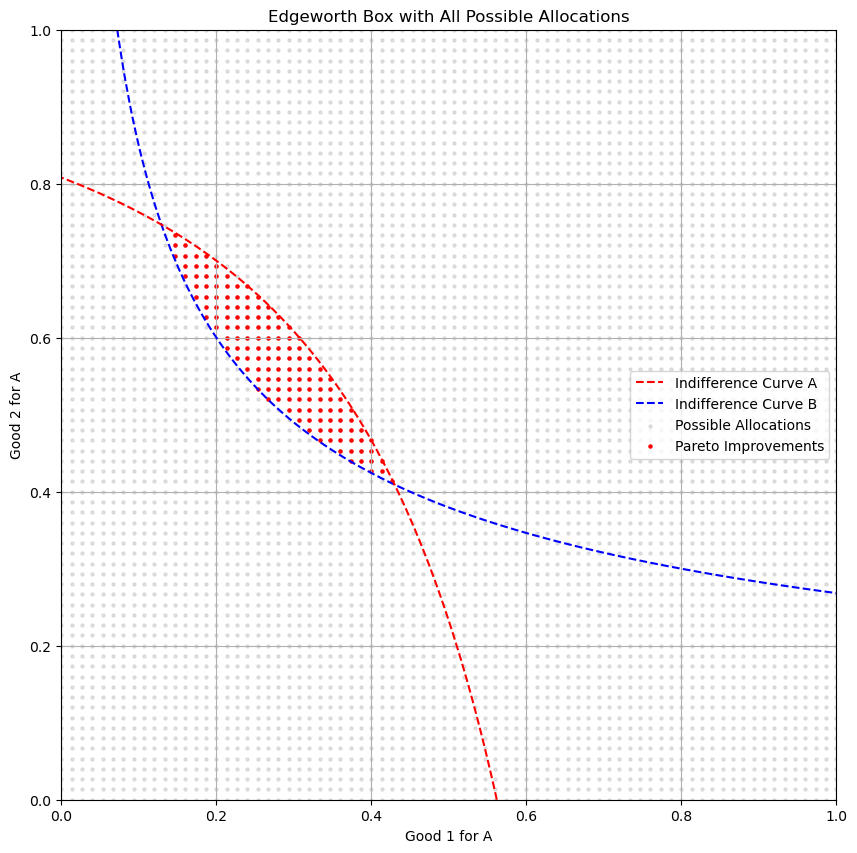

In [932]:
# Unpacking allocations and Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)  # Extracting Pareto improvements
all_x1, all_x2 = zip(*allocations)  # Extracting all possible allocations

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='grey', s=5, alpha=0.2, label="Possible Allocations")
plt.scatter(pareto_x1, pareto_x2, color='red', s=5, label="Pareto Improvements")

x1 = np.linspace(0, 1, 100)  # Creates an array of 100 points between 0 and 1
x2 = np.linspace(0, 1, 100)


# Assuming utility_A and utility_B are your utility functions, needing appropriate definitions above
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1-x1, 1-x2)
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)  # Assuming utility_A takes these parameters
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)  # Assuming utility_B takes these parameters

# Indifference curves
plt.contour(x1A_grid, x2A_grid, utility_A_grid, levels=[initial_utility_A], colors='blue', linestyles='dashed')
plt.contour(x1B_grid, x2B_grid, utility_B_grid, levels=[initial_utility_B], colors='red', linestyles='dashed')

# Creating custom legend for contour lines since plt.contour does not support 'label' argument
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Indifference Curve A')
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Indifference Curve B')
plt.legend(handles=[red_line, blue_line, plt.scatter([],[], color='grey', s=5, alpha=0.2, label="Possible Allocations"), plt.scatter([],[], color='red', s=5, label="Pareto Improvements")])

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.title("Edgeworth Box with All Possible Allocations")
plt.grid(True)
plt.show()


# Opgave 2

Nu beregnes fejlen i markedsclearingsprisen.

Vi starter med at definere et sæt af priser for p1, jf. opgaven. Vi anvender en list comprehension, der laver en liste ved den givne algoritme, indtil den når 2.5. Desuden husker vi at gode 2 er numeraie så det skal også defineres

In [933]:
p1 = [0.5 + (2 * i/N) for i in range(int(2*N) + 1) if 0.5 + i/N <= 2.5]
p1 = [i for i in p1 if i <= 2.5] # laver listen
print(p1) # printer liste for kontrol
p2 = 1 # Numeraire

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

Vi definerer to tomme lister for fejlene i clearingspriserne for henholdsvis gode 1 og 2:

In [934]:
epsilon1_values = []
epsilon2_values = []

Vi definerer markedsfejlen ved de to forbrugeres efterspørgsel ved givne priser.

In [935]:
for p1 in p1_values:
    epsilon1 = demand_A_x1(p1, omega_A1, omega_A2, alpha) + demand_B_x1(p1, omega_B1, omega_B2, beta) - (omega_A1 + omega_B1)
    epsilon2 = demand_A_x2(p1, omega_A1, omega_A2, alpha) + demand_B_x2(p1, omega_B1, omega_B2, beta) - (omega_A2 + omega_B2)
    epsilon1_values.append(epsilon1)
    epsilon2_values.append(epsilon2)

# Opgave 3

Nu kan vi finde markedsclearingsprisen, ved at finde det x der minimerer fejlen fra opgave 2.

In [936]:
# Konverterer fejl-værdierne til absolutte værdier:
abs_epsilon1_values = np.abs(epsilon1_values)

# Finde indeks for minimum-værdien:
min_error_index = np.argmin(abs_epsilon1_values)

# Finder den pris der passer til minimumværdiens indeks.
market_clearing_p1 = p1_values[min_error_index]
market_clearing_error = epsilon1_values[min_error_index]

market_clearing_p1.round(3), market_clearing_error

(0.932, 0.007729468599033673)

Vi har altså en clearingspris på 0.932 (afrundet), da det er denne pris der medfører den mindste clearingsfejl (0.0077).

Vi gemmer allokeringen ved den givne pris til senere

In [937]:
allocation_3 = allocation_at_price(market_clearing_p1, alpha, omega_A1, omega_A2)
print(allocation_3)

(0.3739130434782609, 0.6972972972972974)


# Opgave 4.a

Initialnytteværdierne er allerede beregnet tidligere i opgaven. Derfor starter vi med at definere en variabel der fanger max-nytteværdien, og lader den starte ved værdien 0. Desuden vælger vi en optimal p1 værdi, der har angivet en tom værdi (None).

In [938]:
max_utility = 0
optimal_p1 = None

Nu itererer vi over de forskellie p1 værdier i p1_values, således at vi kan beregne efterspørgslen fra de to forbrugere givet priserne og deres nyttefunktioner. Vi bruger dette til at kunne sammenligne de forskellige valg som forbruger A kan tage når A skal maksimere sin nytte ved at vælge prisen.

Dernæst undersøger vi de forskellige priser, og ser om B's nytte ikke er faldet (Pareto-kriterie), og undersøger vi om A kan vælge en højere pris, givet at Pareto-kriteriet er overholdt.

Begge ting sker over iterationen og optimal p1 opdateres løbende.

In [939]:
for p1 in p1_values:
    xA1 = demand_A_x1(p1, omega_A1, omega_A2, alpha)
    xA2 = demand_A_x2(p1, omega_A1, omega_A2, alpha)
    xB1 = demand_B_x1(p1, omega_B1, omega_B2, beta)
    xB2 = demand_B_x2(p1, omega_B1, omega_B2, beta)
    
    # Ensure x1 and x2 are within the bounds for both A and B
    if 0 <= xA1 <= 1 and 0 <= xA2 <= 1 and 0 <= xB1 <= 1 and 0 <= xB2 <= 1:
        utility_B_current = utility_B(xB1, xB2, beta)
        if utility_B_current >= initial_utility_B:  # Ensure B is not worse off
            utility_A_current = utility_A(xA1, xA2, alpha)
            if utility_A_current > max_utility:
                max_utility = utility_A_current
                optimal_p1 = p1

print(f"Optimal p1: {optimal_p1}, Maximum Utility for A: {max_utility}")

Optimal p1: 1.472972972972973, Maximum Utility for A: 0.6875211855852789


Gemmer allokeringen til senere

In [940]:
allocation_4a = allocation_at_price(optimal_p1, alpha, omega_A1, omega_A2)
print(allocation_4a)

(0.33455657492354746, 0.9855855855855858)


# Opgave 4b

Du optimerer vi ud fra forbruger A, men hvor forbruger A kan vælge alle priser (ikke kun de priser der var givet ved opgave 2)

Først definerer vi constraints. Den består af de to demandfunctions og udregner så en utility der gør, at forbruger B ikke må være dårligere stillet end før. Det er altså en pareto-contraint.

In [941]:
def constraints(x, omega_B1, omega_B2, beta):
    x1, x2 = x[0], x[1]
    return [
        utility_B(x1, x2, beta) - utility_B(omega_B1, omega_B2, beta),  # Ensure utility B is at least its initial value
        1 - x1,  # x1 must be <= 1
        1 - x2   # x2 must be <= 1
    ]


Dernæst definerer vi objective-funktionen. Objective-funktionen maksimerer Forbruger A's nytte ved at justere prisen løbende.

Det gøres ved først at beregne Forbruger B's forbrug af begge varer ved den givne pris, hvorefter Forbruger A's forbrug bestemmes som den resterende del af den totale beholdning (Walras).

Funktionen returnerer den negative værdi af Forbruger A's nytte for at muliggøre maksimering gennem en minimiseringsproces (Scipy.Optimize Minimize minimerer nemlig)

In [942]:

# Objective function to maximize A's utility by choosing p1
def objective(x, alpha):
    x1, x2 = x[0], x[1]
    return -utility_A(x1, x2, alpha)  # Negating because we're maximizing A's utility


Sidst bruger bruger vi så minimize() funktionen. 

Funktionen er bygget op således:
minimize(function to be minimized, initial guess, bounds on the variables, constraints)

Vi har fun=objective, fordi det er vores objective funktion der skal minimeres. (negative objective function)

Vi har x0=np.array([1]) som initial guess fordi vi gerne vil have muligheden for at have flere dimensioner (dette er standard, selvom vi kunne laver en skalaroptimering, altså 1 variabel)

Vi har bounds=[(0, 1)] som bounds at p1 skal være positivt, og p2 ikke er bound.

In [943]:
initial_guess = [0.1, 0.1]  # Initial guess for x1 and x2

# Optimization call
result = minimize(
    fun=objective,
    x0=initial_guess,
    args=(alpha,),
    bounds=[(0, 1), (0, 1)],  # Explicit bounds for x1 and x2
    constraints={
        'type': 'ineq',
        'fun': constraints,
        'args': (omega_B1, omega_B2, beta)
    }
)

In [944]:
# Handling the results of optimization
if result.success:
    x1_optimal, x2_optimal = result.x
    print(f"Optimal x1: {x1_optimal:.3f}, Optimal x2: {x2_optimal:.3f}")
else:
    print("Optimization failed:", result.message)

Optimal x1: 0.289, Optimal x2: 0.620


Vi gemmer allokeringen ved den givne pris til senere

In [945]:
allocation_4b = x1_optimal, x2_optimal

# Opgave 5a

Vi har fra tidligere defineret sættet af allokeringer med Pareto-forbedringer.

Nu definerer vi to variable til at fange højeste utility fra allokeringerne, samt selve den optimale allokering.

In [946]:
max_utility_A = -np.inf # Starter ved minus uendelig.
optimal_allocation = None # Gøres tom fra starten (skal være None, fordi det bliver et sæt af værdier).

Nu itererer vi over de forskellige allokeringer, og undersøger om current_utility er højere end max_utility - hvis ja, så erstatter vi værdien.

In [947]:
# Iterate over each possible allocation in pareto_improvements
for allocation in pareto_improvements:
    x1, x2 = allocation
    current_utility_A = utility_A(x1, x2, alpha)
    # Check if the current utility is greater than the max utility found so far
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        optimal_allocation = (x1, x2)

Når vi har fundet de to bedste værdier der giver højeste utility gemmer vi dem i x1_max og x2_max.

In [948]:
x1_max, x2_max = optimal_allocation

Dernæst printer vi alle værdierne.

In [949]:
# Printing the results with proper formatting
label_width = max(len("Optimal x1:"), len("Optimal x2:"), len("Max Utility A:"))
spacing = 2  # Spaces between the longest label and the value

print(f"{'Optimal x1:':<{label_width}}{' ' * spacing}{x1_max:12.4f}\n"
      f"{'Optimal x2:':<{label_width}}{' ' * spacing}{x2_max:12.4f}\n"
      f"{'Max Utility A:':<{label_width}}{' ' * spacing}{max_utility_A:12.4f}")

Optimal x1:           0.3067
Optimal x2:           0.6000
Max Utility A:        0.4797


Vi gemmer også her allokeringerne til senere:

In [950]:
allocation_5a = (x1_max, x2_max)
print(allocation_5a)

(0.30666666666666664, 0.6)


# Opgave 5b

Først defineres constrainten at forbruger B's nytte ikke er lavere end initial (Pareto-constraint).

In [951]:
def constraint_C(x):
    x1, x2 = x[0], x[1]
    utility_A_current = utility_A(x1, x2, alpha)
    utility_B_current = utility_B(x1, x2, beta)  
    return utility_A_current - initial_utility_A, utility_B_current - initial_utility_B

Nu defineres den negative utility:

In [952]:
def neg_utility_A(x):
    x1, x2 = x[0], x[1]
    return -utility_A(x1, x2, alpha)

Her foretages optimeringen:

In [953]:
initial_guess = [0.1, 0.1]

# Define bounds for allocations
bounds = [(0, None), (0, None)]  # Corrected to apply to both x1 and x2

# Perform the optimization to minimize negative utility of A sutility_Bject to constraints
result = minimize(neg_utility_A, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_C})

x1_max, x2_max = result.x
utility_A_max = -result.fun

Printer resultater:

In [954]:
label_width = max(len("Optimal x1:"), len("Optimal x2:"), len("Max Utility A:"))
spacing = 2  # Spaces between the longest label and the value

print(f"{'Optimal x1:':<{label_width}}{' ' * spacing}{x1_max:12.4f}\n"
      f"{'Optimal x2:':<{label_width}}{' ' * spacing}{x2_max:12.4f}\n"
      f"{'Max Utility A:':<{label_width}}{' ' * spacing}{utility_A_max:12.4f}")


Optimal x1:           0.2895
Optimal x2:           0.6197
Max Utility A:        0.4808


Endnu en gang gemmes allokeringen til senere:

In [955]:
allocation_5b = (x1_max, x2_max)
print(allocation_5b)

(0.28946997909636835, 0.61969154268848)


Vi ser altså, at vi har fået en lidt højere utility, og det skyldes at vi ikke begrænser valget til de sæt vi havde beregnet ved N=75.

Vi kan altså vælge mellem uendelig mange flere sæt, men det kræver at vi burger en optimizer og ikke bare undersøger allokeringer.

# Opgave 6a

Vi definerer først vores utility-funktion (objective-function) som vi vil optimere. Denne defineres som den negative utility-funktion, da vi igen bruger en minimize()-funktion.

In [956]:
def planner_utility(x1, x2, alpha, beta):
    total_utility = utility_A(x1, x2, alpha) + utility_B(x1, x2, beta)
    return total_utility

def planner_objective(x, alpha, beta):
    x1, x2 = x[0], x[1]
    return -planner_utility(x1, x2, alpha, beta)

Den eneste restriktion er, at x1 og x2 skal være mellem 0 og 1 hver især, men den er givet allerede ved initial endowments.

Derfor kan vi gå direkte til optimering uden restriktioner.

In [957]:
x0 = np.array([0.1, 0.1]) # Laver initialgættet

# Definerer bounds
bounds = [(0, 1), (0, 1)]  # Assuming x1 and x2 should be between 0 and 1.

# Perform the optimization
result = minimize(fun=planner_objective, x0=x0, args=(alpha, beta), bounds=bounds)

# Extract the results
x1_max, x2_max = result.x
# To get the maximum utility, calculate it directly using the optimal x1 and x2 found
utility_A_max = utility_A(x1_max, x2_max, alpha)
utility_B_max = utility_B(x1_max, x2_max, beta)

# Printing the results
print(f"Optimal x1: {x1_max}\nOptimal x2: {x2_max}\nUtility for A: {utility_A_max}\nUtility for B: {utility_B_max}")

Optimal x1: 0.33333540514158244
Optimal x2: 0.6666669979961634
Utility for A: 0.5291349555686058
Utility for B: 0.5291324124080086


Og igen gemmes allokeringen

In [958]:
allocation_6a = (x1_max, x2_max)
print(allocation_6a)

(0.33333540514158244, 0.6666669979961634)


# Opgave 6b

In [959]:
allocation_3, allocation_4a, allocation_4b, allocation_5a, allocation_5b, allocation_6a

((0.3739130434782609, 0.6972972972972974),
 (0.33455657492354746, 0.9855855855855858),
 (0.2894699800865892, 0.6196915416301546),
 (0.30666666666666664, 0.6),
 (0.28946997909636835, 0.61969154268848),
 (0.33333540514158244, 0.6666669979961634))

In [960]:
specific_allocations = allocation_3, allocation_4a, allocation_4b, allocation_5a, allocation_5b, allocation_6a

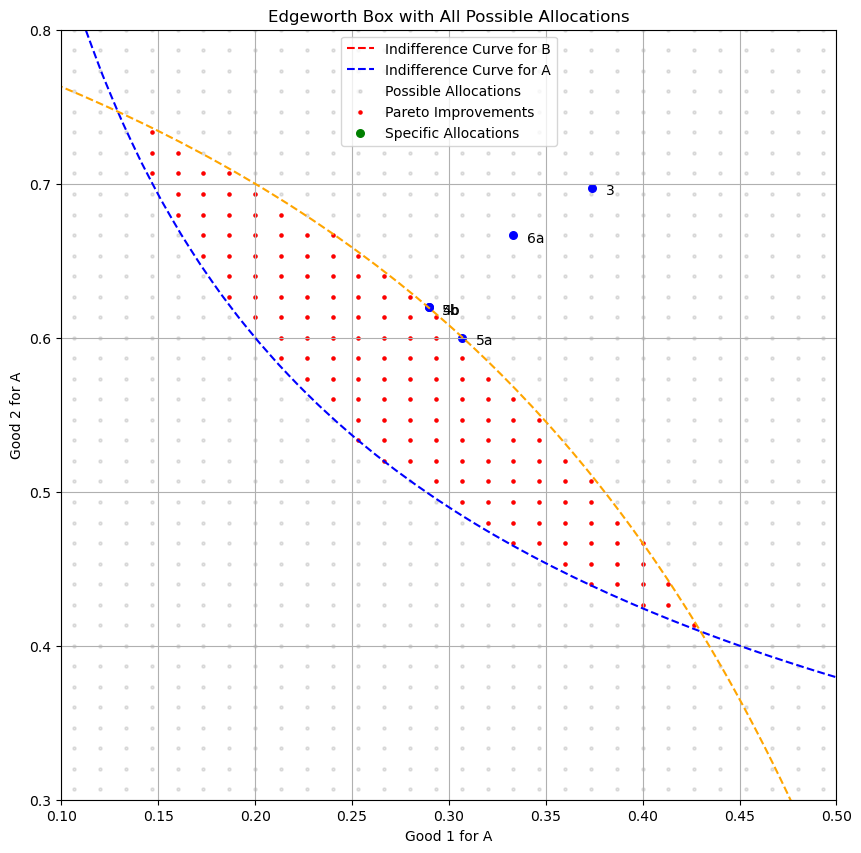

In [961]:

# Unpacking allocations and Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)  # Extracting Pareto improvements
all_x1, all_x2 = zip(*allocations)  # Extracting all possible allocations
specific_labels = ['3', '4a', '4b', '5a', '5b', '6a']  # Labels for specific allocations
specific_x1, specific_x2 = zip(*specific_allocations)  # Extract x1 and x2 components

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='grey', s=5, alpha=0.2, label="Possible Allocations")
plt.scatter(pareto_x1, pareto_x2, color='red', s=5, label="Pareto Improvements")
specific_points = plt.scatter(specific_x1, specific_x2, color='blue', s=30, label="Specific Allocations")

# Label specific allocations
for i, label in enumerate(specific_labels):
    plt.annotate(label, (specific_x1[i], specific_x2[i]), textcoords="offset points", xytext=(10,-5), ha='left')

# Generating grids for indifference curves
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1-x1, 1-x2)

utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)

# Plotting indifference curves
plt.contour(x1A_grid, x2A_grid, utility_A_grid, levels=[initial_utility_A], colors='blue', linestyles='dashed')
plt.contour(x1B_grid, x2B_grid, utility_B_grid, levels=[initial_utility_B], colors='orange', linestyles='dashed')

# Custom legend for contour lines
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Indifference Curve for B')
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Indifference Curve for A')
plt.legend(handles=[red_line, blue_line, plt.scatter([], [], color='grey', s=5, alpha=0.2, label="Possible Allocations"), plt.scatter([], [], color='red', s=5, label="Pareto Improvements"), plt.scatter([], [], color='green', s=30, label="Specific Allocations")])

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.xlim([0.1, 0.5])
plt.ylim([0.3, 0.8])
plt.title("Edgeworth Box with All Possible Allocations")
plt.grid(True)
plt.show()

# Opgave 7

Vi løser opgaven

In [962]:
W = np.random.uniform(0, 1, (50, 2))

# Opgave 8

Vi har nu et sæt af initialallokeringer for forbruger A. Vi kan iterere over sættet og løse problemet

Vi starter med at lave en tom liste:

In [963]:
allocation_8 = []

Nu itererer vi over sættet:

In [964]:
for omega_A1, omega_A2 in W:
    initial_utility_A = utility_A(omega_A1, omega_A2, alpha)
    initial_utility_B = utility_B(1 - omega_A1, 1 - omega_A2, beta)

    initial_guess = [0.1, 0.1]

    # Define bounds for allocations
    bounds = [(0, None), (0, None)]  # Bounds apply to both variables

    # Perform the optimization to minimize negative utility of A subject to constraints
    result = minimize(neg_utility_A, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_C})

    x1_max, x2_max = result.x
    utility_A_max = -result.fun

    if x1_max <= 1 and x2_max <= 1:
        allocation_8.append((x1_max, x2_max))

/Users/jacob/Documents/GitHub/projects-2024-jacobogmads/Jacob/InaurguralJacob.py:22: RuntimeWarning: invalid value encountered in scalar power
  return (1-x1)**beta * (1-x2)**(1 - beta)


In [965]:
print(allocation_8)

[(0.5165566294833873, 0.8103978824432057), (0.3130549015781604, 0.6457520615073652), (0.28836854386633104, 0.6184263813845764), (0.46090241147808875, 0.7737435973473592), (0.5964715817167715, 0.8553358869771621), (0.26626045953045824, 0.5920618705067067), (0.17978272583516058, 0.46716585709794856), (0.06529333693636342, 0.21839427020226637), (0.1630087121620915, 0.4378934940454413), (0.5705436220370596, 0.841624354470631), (0.2746927583397833, 0.6023705500375653), (0.4557785160198604, 0.7701097701014895), (0.45132284716948057, 0.7669123146552691), (0.31121373891613846, 0.6437879697518695), (0.18102140522938348, 0.4692517808890499), (0.3132791735076256, 0.6459905391916), (0.5860080474669386, 0.8498955117209129), (0.5894880042856036, 0.8517185616216527), (0.4578295408508725, 0.7715723351952646), (0.608292743668301, 0.8613367053761377), (0.12619235285489028, 0.3661524861782638), (0.3594819501417383, 0.691828369814502), (0.34487029469655145, 0.6780059960140294), (0.052948708554104565, 0.18

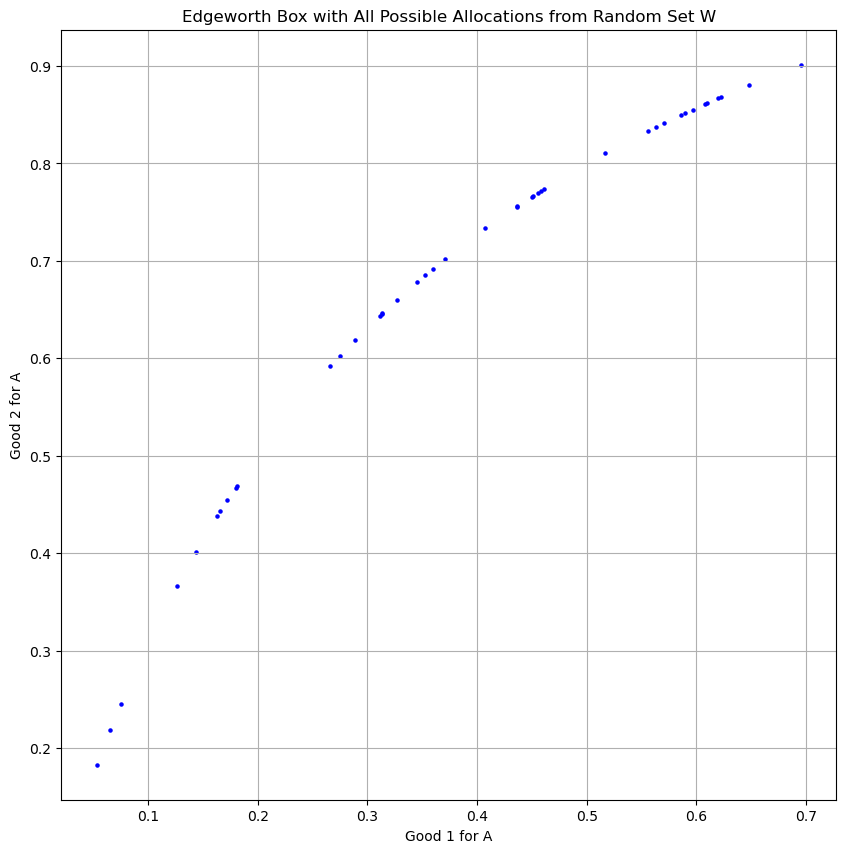

In [966]:
all_x1, all_x2 = zip(*allocation_8)  # Extracting all possible allocations

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='blue', s=5, alpha=1, label="Possible Allocations")

x1 = np.linspace(0, 1, 100)  # Creates an array of 100 points between 0 and 1
x2 = np.linspace(0, 1, 100)

# Creating grid for utility calculations
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1 - x1, 1 - x2)

# Calculating utility for each point in the grid
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)  # Assuming utility_A takes these parameters
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)  # Assuming utility_B takes these parameters

# Initial utilities for the starting allocation - using the first allocation as an example
initial_utility_A = utility_A(allocations[0][0], allocations[0][1], alpha)
initial_utility_B = utility_B(1 - allocations[0][0], 1 - allocations[0][1], beta)

# Plotting indifference curves
# Creating custom legend for contour lines since plt.contour does not support 'label' argument

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.title("Edgeworth Box with All Possible Allocations from Random Set W")
plt.grid(True)
plt.show()